<a href="https://colab.research.google.com/github/rvssridatta/DL/blob/main/topical_chat/topical_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing required modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# url = "https://docs.google.com/spreadsheets/d/1dFdlvgmyXfN3SriVn5Byv_BNtyroICxdgrQKBzuMA1U/"


#uploading the csv file which downloaded from above URL

In [2]:
# df = pd.read_csv(url)
#Read the csv file with help of pandas and store it in 'f'.
f=pd.read_csv('/content/topical_chat.csv - Sheet1.csv',error_bad_lines=False, engine="python")

<ipython-input-2-f5c0d5669029>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  f=pd.read_csv('/content/topical_chat.csv - Sheet1.csv',error_bad_lines=False, engine="python")


In [3]:
#printing head portion of 'f' dataframe
f.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpful...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


#dropping unwanted columns from dataframe and storing the new dropped dataframe in 'df' variable


In [4]:
df = f.drop('conversation_id', axis=1)

#Checking nan values or null values

In [6]:
nan_rows = df[df.isnull().T.any()]

In [7]:
nan_rows

,message,sentiment
20124,NaN,Disgusted
28552,NaN,Happy
31504,NaN,Surprised
83361,NaN,Curious to dive deeper
95303,NaN,Happy


#since nan values are very low dropping those rows

In [8]:
df =df.dropna()

In [9]:
nan_rows1 = df[df.isnull().T.any()]

In [10]:
nan_rows1

,message,sentiment


In [11]:
df.describe()

,message,sentiment
count,188373,188373
unique,184112,8
top,"Hi, how are you?",Curious to dive deeper
freq,317,80887


In [14]:
# !pip install datasets transformers huggingface_hub
# !apt-get install git-lfs

In [15]:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


In [12]:
X = df["message"]
y = df["sentiment"]

In [13]:
X = X.str.strip()

#cleaning the text data

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punct(text):
  '''
  This function removes any punctuation marks from data as they are unwanted in our use case
  '''
  text = "".join([char for char in text if char not in string.punctuation])
  return text

In [16]:
X = X.apply(lambda x: remove_punct(x))
X.head()

0                 Are you a fan of Google or Microsoft
1    Both are excellent technology they are helpful...
2    Im not  a huge fan of Google but I use it a lo...
3    Google provides online related services and pr...
4    Yeah their services are good Im just not a fan...
Name: message, dtype: object

#any unwanted combinations of non alphabet will be removed with help of regular expression.
#Also tokenizing the text into tokens

In [17]:
import re

def tokenize(text):
  '''
  This function help in tokenizing the data.
  '''
  tokens = re.split('\W+',text)
  return tokens

df['text_tokenized'] = X.apply(lambda x:tokenize(x.lower()))

df.head()

,message,sentiment,text_tokenized
0,Are you a fan of Google or Microsoft?,Curious to dive deeper,"[are, you, a, fan, of, google, or, microsoft]"
1,Both are excellent technology they are helpful...,Curious to dive deeper,"[both, are, excellent, technology, they, are, ..."
2,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper,"[im, not, a, huge, fan, of, google, but, i, us..."
3,Google provides online related services and p...,Curious to dive deeper,"[google, provides, online, related, services, ..."
4,"Yeah, their services are good. I'm just not a...",Curious to dive deeper,"[yeah, their, services, are, good, im, just, n..."


In [18]:
import nltk #natural language tool kit , to download stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#stopwords are some unwanted words we can ignore them for classification

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [24]:
#define fun to remove stopwords

def remove_stopwords(tokenized_text):
  '''
  This function removes unwanted stopwords from given text data
  '''
  text = [word for word in tokenized_text if word not in stopwords]
  return text

df['text_nostop'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,message,sentiment,text_tokenized,text_nostop
0,Are you a fan of Google or Microsoft?,Curious to dive deeper,"[are, you, a, fan, of, google, or, microsoft]","[fan, google, microsoft]"
1,Both are excellent technology they are helpful...,Curious to dive deeper,"[both, are, excellent, technology, they, are, ...","[excellent, technology, helpful, many, ways, s..."
2,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper,"[im, not, a, huge, fan, of, google, but, i, us...","[im, huge, fan, google, use, lot, think, monop..."
3,Google provides online related services and p...,Curious to dive deeper,"[google, provides, online, related, services, ...","[google, provides, online, related, services, ..."
4,"Yeah, their services are good. I'm just not a...",Curious to dive deeper,"[yeah, their, services, are, good, im, just, n...","[yeah, services, good, im, fan, intrusive, per..."


#As we are doing multiclass classification , so we need to convert the string data into categories or classes.

In [53]:
region_dictionary = {'Angry':1, 'Curious to dive deeper':2, 'Disgusted':3, 'Fearful':4, 'Happy':5, 'Neutral':6, 'Sad':7, 'Surprised':8 }
df["sentiment"] = df["sentiment"].apply(lambda x: region_dictionary[x])

In [54]:
df["sentiment"]

0         2
1         2
2         2
3         2
4         2
         ..
188373    8
188374    2
188375    2
188376    5
188377    6
Name: sentiment, Length: 188373, dtype: int64

In [57]:
X = df["text_nostop"]
y = df["sentiment"]


In [58]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: sentiment, dtype: int64

In [59]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [60]:
X_train.head()

51179      [either, know, green, lantern, supposed, comedy]
112716     [know, people, facebook, world, 200, years, ago]
71326     [heard, two, get, stuck, together, cannot, sep...
165286    [think, president, indonessia, megawati, sukar...
176323    [six, rings, man, legend, favorite, understand...
Name: text_nostop, dtype: object

In [61]:
# def preprocess_function(examples):
#    return tokenizer(examples["text"], truncation=True)

In [62]:
from tensorflow.python.trackable import base as trackable
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

#converting x_train into tokens

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [64]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [65]:
X_train_seq[0]

[124, 1, 669, 1530, 745, 141]

In [66]:
type(X_train_seq)

list

In [67]:
# Longest String in list
# using max() + key
res = max(X_train_seq, key = len)
len(res)

69

In [68]:
# Longest String in list
# using max() + key
res = max(X_test_seq, key = len)
len(res)

61

#Padding the sequences based on the highest value for matrix computations

In [69]:
X_train_seq_padded = pad_sequences(X_train_seq,60)
X_test_seq_padded = pad_sequences(X_test_seq,60)

In [70]:
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

In [71]:
def recall_m(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred,0,1)))
  possible_positives = K.sum(K.round(K.clip(y_true,0,1)))
  recall = true_positives/(possible_positives + K.epsilon())
  return recall


In [72]:
def precision_m(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred,0,1)))
  predicted_positives = K.sum(K.round(K.clip(y_true,0,1)))
  precision = true_positives/(predicted_positives + K.epsilon())
  return precision

#with the help of Sequential class we defined "many to many" RNN neural network

In [80]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1,32))  #for model tuning change 32 with some random number it is output of embedding
model.add(LSTM(32, dropout = 0, recurrent_dropout = 0 ))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(9,activation = 'softmax')) # since multiclass classification 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          1178368   
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 9)                 297       
                                                                 
Total params: 1,188,041
Trainable params: 1,188,041
Non-trainable params: 0
_________________________________________________________________


In [84]:
#compile the model SparseSoftmaxCrossEntropyWithLogits
import tensorflow as tf
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics = ['accuracy',precision_m,recall_m])
# model.compile(optimizer = 'adam',loss = SparseSoftmaxCrossEntropyWithLogits,metrics = ['accuracy',precision_m,recall_m])

In [85]:
# y_train

In [87]:
#fit the model
history = model.fit(X_train_seq_padded,y_train,batch_size = 1024,epochs = 2,validation_data=(X_test_seq_padded,y_test))

Epoch 1/2
138/138 [==============================] - 37s 269ms/step - loss: 1.4201 - accuracy: 0.4305 - precision_m: 2.6919 - recall_m: 2.6919 - val_loss: 1.3701 - val_accuracy: 0.4376 - val_precision_m: 2.7157 - val_recall_m: 2.7157
Epoch 2/2
138/138 [==============================] - 37s 268ms/step - loss: 1.3156 - accuracy: 0.4682 - precision_m: 2.6806 - recall_m: 2.6806 - val_loss: 1.3280 - val_accuracy: 0.4627 - val_precision_m: 2.6759 - val_recall_m: 2.6759


In [92]:
type(X_train_seq_padded)

numpy.ndarray

In [93]:
y_pred = model.predict(X_train_seq_padded)


4415/4415 [==============================] - 38s 9ms/step


In [99]:
y_pred.shape

(141279,)

In [100]:
y_train.shape

(141279,)

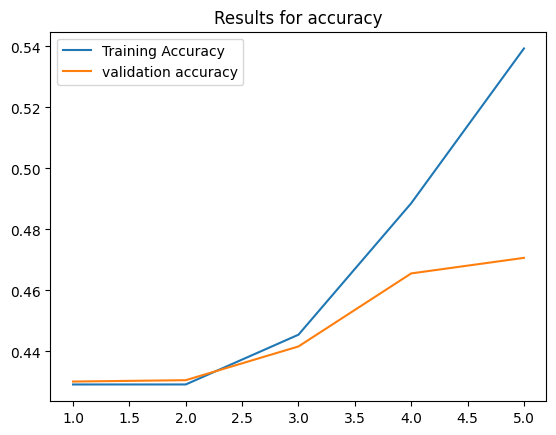

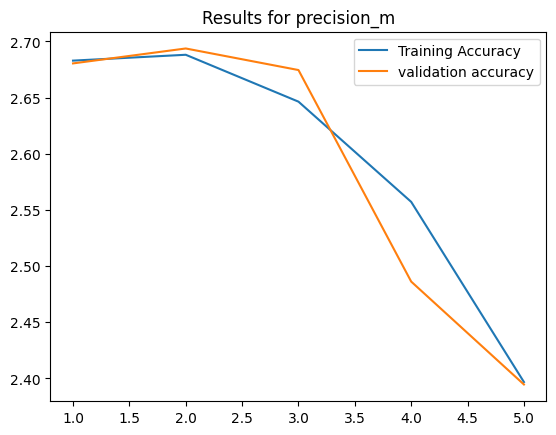

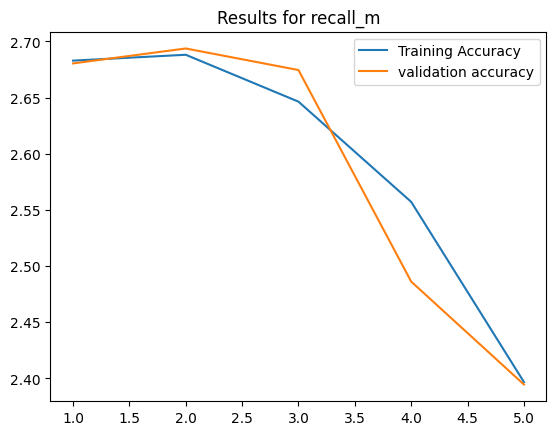

In [79]:
#plot evalutation metrics

import matplotlib.pyplot as plt

for i in ['accuracy','precision_m','recall_m']:
  acc = history.history[i]
  val_acc = history.history['val_{}'.format(i)]
  epochs = range(1,len(acc)+1)

  plt.figure()
  plt.plot(epochs,acc,label = 'Training Accuracy')
  plt.plot(epochs,val_acc,label = 'validation accuracy')
  plt.title('Results for {}'.format(i))
  plt.legend()
  plt.show()

In [ ]:
# model.save('model.pkl')
# model.save_weights('ModelWeights')

In [70]:
model.save('model_saved')

In [75]:
# from google.colab import files
# files.download('model_saved')

In [76]:
history = model.fit(X_train_seq_padded,y_train,batch_size = 128,epochs = 50,validation_data=(X_test_seq_padded,y_test))

Epoch 1/50
493/493 [==============================] - 32s 64ms/step - loss: 0.7985 - accuracy: 0.7047 - precision_m: 1.9024 - recall_m: 1.9024 - val_loss: 1.5884 - val_accuracy: 0.4463 - val_precision_m: 1.9878 - val_recall_m: 1.9878
Epoch 2/50
493/493 [==============================] - 30s 60ms/step - loss: 0.7502 - accuracy: 0.7226 - precision_m: 1.8273 - recall_m: 1.8273 - val_loss: 1.6437 - val_accuracy: 0.4345 - val_precision_m: 1.9870 - val_recall_m: 1.9870
Epoch 3/50
493/493 [==============================] - 30s 60ms/step - loss: 0.7046 - accuracy: 0.7403 - precision_m: 1.7691 - recall_m: 1.7691 - val_loss: 1.7468 - val_accuracy: 0.4382 - val_precision_m: 1.8655 - val_recall_m: 1.8655
Epoch 4/50
493/493 [==============================] - 30s 61ms/step - loss: 0.6578 - accuracy: 0.7597 - precision_m: 1.7152 - recall_m: 1.7152 - val_loss: 1.7895 - val_accuracy: 0.4411 - val_precision_m: 1.8488 - val_recall_m: 1.8488
Epoch 5/50
493/493 [==============================] - 30s 60ms/s

In [77]:
model.save('model_saved_ep50')

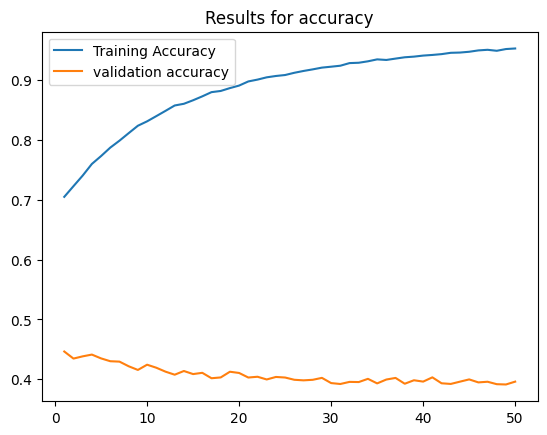

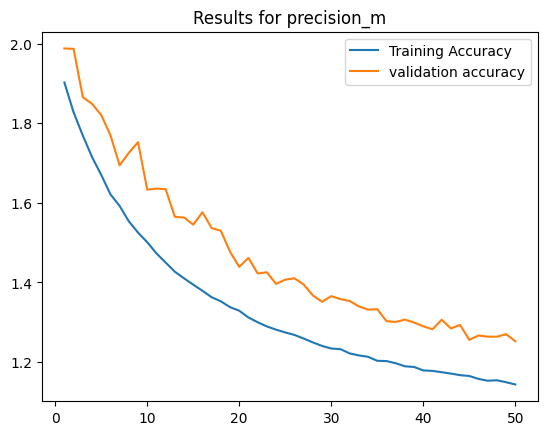

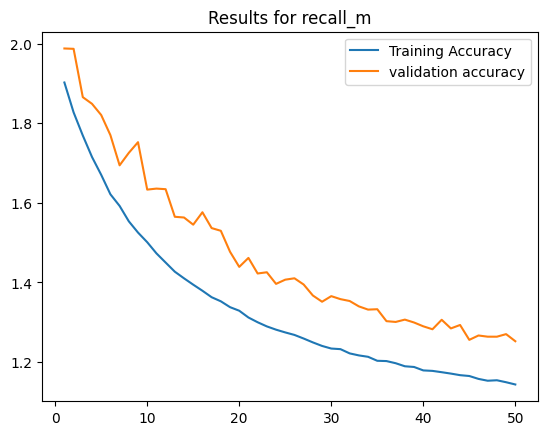

In [87]:
#plot evalutation metrics

import matplotlib.pyplot as plt

for i in ['accuracy','precision_m','recall_m']:
  acc = history.history[i]
  val_acc = history.history['val_{}'.format(i)]
  epochs = range(1,len(acc)+1)

  plt.figure()
  plt.plot(epochs,acc,label = 'Training Accuracy')
  plt.plot(epochs,val_acc,label = 'validation accuracy')
  plt.title('Results for {}'.format(i))
  plt.legend()
  plt.show()

In [85]:
# model.save('model_saved')

In [ ]:
history = model.fit(X_train_seq_padded,y_train,batch_size = 256,epochs = 100,validation_data=(X_test_seq_padded,y_test))

Epoch 1/100
247/247 [==============================] - 22s 88ms/step - loss: 0.1072 - accuracy: 0.9601 - precision_m: 1.1333 - recall_m: 1.1333 - val_loss: 8.5980 - val_accuracy: 0.3985 - val_precision_m: 1.2417 - val_recall_m: 1.2417
Epoch 2/100
247/247 [==============================] - 23s 92ms/step - loss: 0.0971 - accuracy: 0.9636 - precision_m: 1.1210 - recall_m: 1.1210 - val_loss: 8.8122 - val_accuracy: 0.3952 - val_precision_m: 1.2419 - val_recall_m: 1.2419
Epoch 3/100
247/247 [==============================] - 21s 83ms/step - loss: 0.0946 - accuracy: 0.9651 - precision_m: 1.1175 - recall_m: 1.1175 - val_loss: 9.0473 - val_accuracy: 0.3951 - val_precision_m: 1.2320 - val_recall_m: 1.2320
Epoch 4/100
247/247 [==============================] - 23s 92ms/step - loss: 0.0920 - accuracy: 0.9657 - precision_m: 1.1138 - recall_m: 1.1138 - val_loss: 9.2834 - val_accuracy: 0.3957 - val_precision_m: 1.2280 - val_recall_m: 1.2280
Epoch 5/100
247/247 [==============================] - 20s 8

#for higher epochs the model is producing better accuracy (might be overfitting) still need to explore and implement a solution for better performance.

#B) Text summarization

In [104]:
# !pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21708 sha256=154cb682e01de713cfc639e158998bae37d4baf6a0cac82e1efee35a3b926699
  Stored in directory: /root/.cache/pip/wheels/ba/9f/70/7795228568b81b57a8932755938da9fb1f291b0576752604aa
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=77cece6ab4dc20b47752d37fa4b4563001bef2f18eef70b9464d684cc25614b3
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c9

In [105]:
from sumy.summarizers.text_rank import TextRankSummarizer

In [108]:
f.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpful...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [112]:
# Generate the summaries
summarizer = TextRankSummarizer()
summaries = []
for convo_id, convo in f.groupby('conversation_id'):
    summary = summarizer(convo['message'].tolist(), sentences_count=1)
    summary = ' '.join(summary)
    summaries.append((convo_id, summary))

    if len(summaries) == 100:
        break

# Save the summaries to a file
with open('summaries.txt', 'w') as f:
    for summary in summaries:
        f.write('Conversation ID: {}\nSummary: {}\n\n'.format(summary[0], summary[1]))

TypeError: ignored